# Feature Engineering

## Importing the Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm 

## Creating the DataFrames

In [2]:
df_train = pd.read_csv("gs://business-case/train.csv")
df_stores = pd.read_csv("gs://business-case/stores.csv")

#merge train dataset and stores dataset
df_train_stores = pd.merge(df_train, df_stores, on="store_nbr")

In [3]:
df_holidays = pd.read_csv("gs://business-case/holidays_events.csv")

In [4]:
df_train_stores.head(20)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,Quito,Pichincha,D,13
6,6,2013-01-01,1,CELEBRATION,0.0,0,Quito,Pichincha,D,13
7,7,2013-01-01,1,CLEANING,0.0,0,Quito,Pichincha,D,13
8,8,2013-01-01,1,DAIRY,0.0,0,Quito,Pichincha,D,13
9,9,2013-01-01,1,DELI,0.0,0,Quito,Pichincha,D,13


In [5]:
df_train_stores.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
city            object
state           object
type            object
cluster          int64
dtype: object

### Analysing the dataset

In [6]:
df_train_stores.describe()

,id,store_nbr,sales,onpromotion,cluster
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00,8.481481e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01,4.649735e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00,1.300000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01


#### plotting the month x sales 

In [8]:
df_train_stores['date'] = pd.to_datetime(df_train_stores['date'])

In [9]:
df_train_stores['month'] = df_train_stores['date'].dt.month

In [10]:
df_train_stores['Year'] = df_train_stores['date'].dt.year

In [11]:
df_train_stores

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,month,Year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,1,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,1,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,1,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,1,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,8,2017
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,8,2017
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,8,2017
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,8,2017


In [12]:
df_train_stores = df_train_stores.groupby(["Year","month","family","store_nbr", "date"]).sum().reset_index().drop(columns='cluster')

In [13]:
df_train_stores

,Year,month,family,store_nbr,date,id,sales,onpromotion
0,2013,1,AUTOMOTIVE,1,2013-01-01,0,0.0,0
1,2013,1,AUTOMOTIVE,1,2013-01-02,1782,2.0,0
2,2013,1,AUTOMOTIVE,1,2013-01-03,3564,3.0,0
3,2013,1,AUTOMOTIVE,1,2013-01-04,5346,3.0,0
4,2013,1,AUTOMOTIVE,1,2013-01-05,7128,5.0,0
...,...,...,...,...,...,...,...,...
3000883,2017,8,SEAFOOD,54,2017-08-11,2993627,0.0,0
3000884,2017,8,SEAFOOD,54,2017-08-12,2995409,1.0,1
3000885,2017,8,SEAFOOD,54,2017-08-13,2997191,2.0,0
3000886,2017,8,SEAFOOD,54,2017-08-14,2998973,0.0,0


## Ploting the sales per month of the year 2013

In [131]:
df_train_stores_2013 = df_train_stores[df_train_stores["Year"]== 2013]
df_train_stores_2013

,Year,month,family,store_nbr,date,id,sales,onpromotion
0,2013,1,AUTOMOTIVE,1,2013-01-01,0,0.0,0
1,2013,1,AUTOMOTIVE,1,2013-01-02,1782,2.0,0
2,2013,1,AUTOMOTIVE,1,2013-01-03,3564,3.0,0
3,2013,1,AUTOMOTIVE,1,2013-01-04,5346,3.0,0
4,2013,1,AUTOMOTIVE,1,2013-01-05,7128,5.0,0
...,...,...,...,...,...,...,...,...
648643,2013,12,SEAFOOD,54,2013-12-27,641387,3.0,0
648644,2013,12,SEAFOOD,54,2013-12-28,643169,0.0,0
648645,2013,12,SEAFOOD,54,2013-12-29,644951,2.0,0
648646,2013,12,SEAFOOD,54,2013-12-30,646733,1.0,0


In [100]:
df_train_stores_2013.describe()

,Year,month,store_nbr,id,sales,onpromotion
count,648648.0,648648.000000,648648.000000,648648.000000,648648.00000,648648.0
mean,2013.0,6.510989,27.500000,324323.500000,216.47953,0.0
std,0.0,3.440612,15.585796,187248.693042,734.07453,0.0
min,2013.0,1.000000,1.000000,0.000000,0.00000,0.0
25%,2013.0,4.000000,14.000000,162161.750000,0.00000,0.0
50%,2013.0,7.000000,27.500000,324323.500000,0.00000,0.0
75%,2013.0,9.250000,41.000000,486485.250000,102.00000,0.0
max,2013.0,12.000000,54.000000,648647.000000,46271.00000,0.0


In [133]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 7.7 MB/s eta 0:00:0000:0100:01
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [134]:
import plotly.express as px


Interactions = city, family, store_nbr , onpromotion, year, month, date

In [147]:
df_train_stores_2013

,Year,month,family,store_nbr,date,id,sales,onpromotion
0,2013,1,AUTOMOTIVE,1,2013-01-01,0,0.0,0
1,2013,1,AUTOMOTIVE,1,2013-01-02,1782,2.0,0
2,2013,1,AUTOMOTIVE,1,2013-01-03,3564,3.0,0
3,2013,1,AUTOMOTIVE,1,2013-01-04,5346,3.0,0
4,2013,1,AUTOMOTIVE,1,2013-01-05,7128,5.0,0
...,...,...,...,...,...,...,...,...
648643,2013,12,SEAFOOD,54,2013-12-27,641387,3.0,0
648644,2013,12,SEAFOOD,54,2013-12-28,643169,0.0,0
648645,2013,12,SEAFOOD,54,2013-12-29,644951,2.0,0
648646,2013,12,SEAFOOD,54,2013-12-30,646733,1.0,0


In [ ]:
df_train_stores_2013_filtering = df_train_stores_2013               

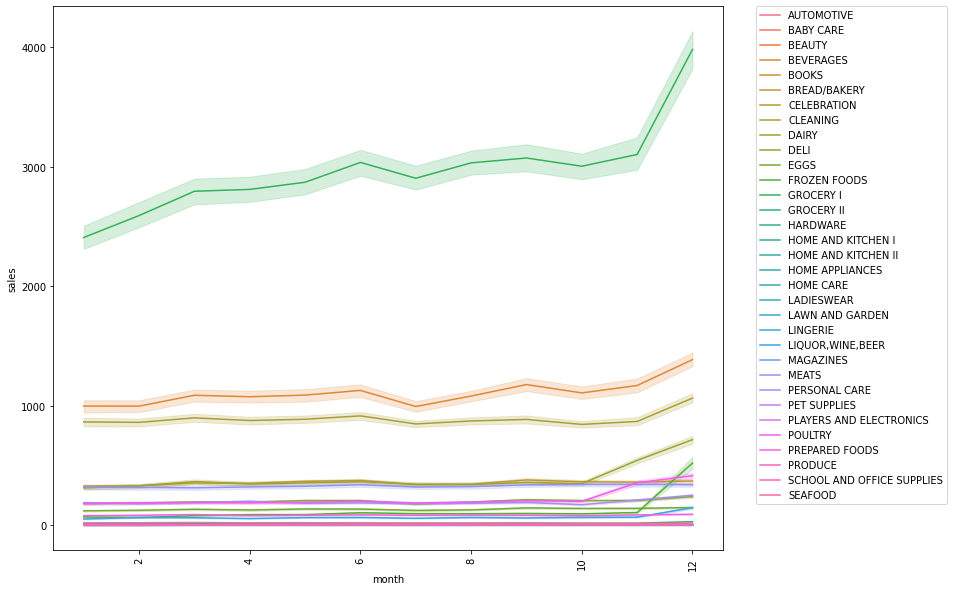

In [55]:
plt.figure(figsize=(12,10))
sns.lineplot(x='month', y='sales', data=df_train_stores_2013, hue='family')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [130]:
df_train_stores_2013[df_train_stores_2013['family'] == 'GROCERY I'].describe()

,Year,month,store_nbr,id,sales,onpromotion
count,19656.0,19656.000000,19656.000000,19656.000000,19656.000000,19656.0
mean,2013.0,6.510989,27.500000,324319.500000,2968.046856,0.0
std,0.0,3.440697,15.586181,187253.311784,2374.436444,0.0
min,2013.0,1.000000,1.000000,12.000000,0.000000,0.0
25%,2013.0,4.000000,14.000000,162165.750000,1624.000000,0.0
50%,2013.0,7.000000,27.500000,324319.500000,2556.000000,0.0
75%,2013.0,9.250000,41.000000,486473.250000,3871.250000,0.0
max,2013.0,12.000000,54.000000,648627.000000,46271.000000,0.0


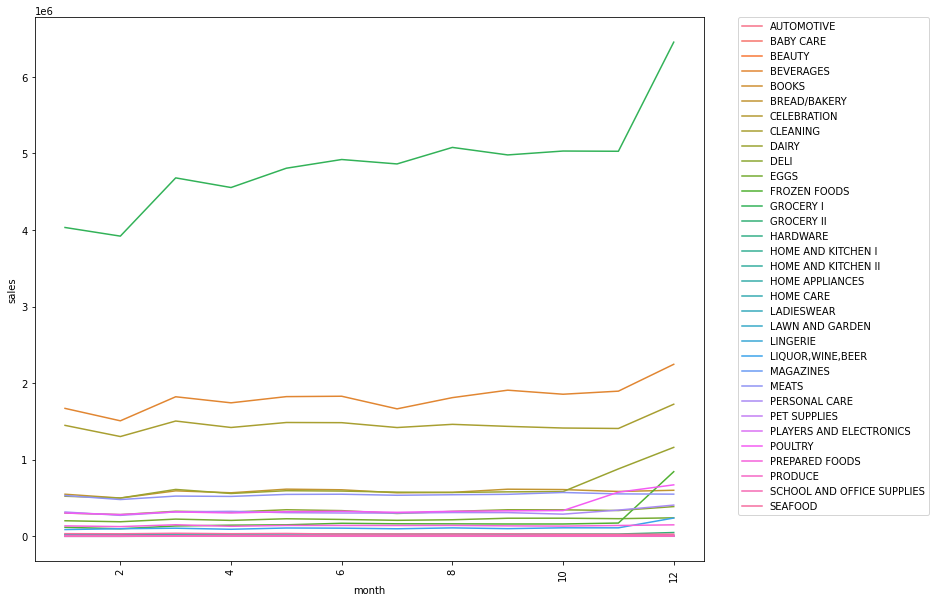

In [110]:
plt.figure(figsize=(12,10))
sns.lineplot(x='month', y='sales', data=df_train_stores_2013_grouped, hue='family')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [102]:
df_train_stores_2013.sort_values('sales')

,Year,month,family,store_nbr,date,id,sales,onpromotion
0,2013,1,AUTOMOTIVE,1,2013-01-01,0,0.0,0
361107,2013,7,MAGAZINES,3,2013-07-02,325073,0.0,0
361106,2013,7,MAGAZINES,3,2013-07-01,323291,0.0,0
361105,2013,7,MAGAZINES,2,2013-07-31,376388,0.0,0
361104,2013,7,MAGAZINES,2,2013-07-30,374606,0.0,0
...,...,...,...,...,...,...,...,...
562464,2013,11,GROCERY I,44,2013-11-07,553686,22024.0,0
615637,2013,12,GROCERY I,34,2013-12-20,629949,22125.0,0
615919,2013,12,GROCERY I,44,2013-12-02,598236,22534.0,0
74603,2013,2,GROCERY I,44,2013-02-14,79674,26067.0,0


In [103]:
df_train_stores_2013_filtered

,month,family,sales
0,1,BEVERAGES,1670653.0
1,1,CLEANING,1448851.0
2,1,GROCERY I,4032240.0
3,2,BEVERAGES,1508254.0
4,2,CLEANING,1302978.0
5,2,GROCERY I,3919400.0
6,3,BEVERAGES,1822220.0
7,3,CLEANING,1505390.0
8,3,GROCERY I,4679847.0
9,4,BEVERAGES,1743121.0


TRYING TO GROUPBY AND SEE HOW IT BEHAVES

In [107]:
df_train_stores_2013['sales'].sum()

140419013.91961718

In [105]:
df_train_stores_2013_GROUPING = pd.DataFrame(df_train_stores_2013.groupby(['month', 'family'])['sales'].sum())
df_train_stores_2013_GROUPING

sales
month family                                  
1     AUTOMOTIVE                  6.557000e+03
      BABY CARE                   0.000000e+00
      BEAUTY                      4.019000e+03
      BEVERAGES                   1.670653e+06
      BOOKS                       0.000000e+00
...                                        ...
12    POULTRY                     6.722132e+05
      PREPARED FOODS              1.501178e+05
      PRODUCE                     9.794000e+03
      SCHOOL AND OFFICE SUPPLIES  0.000000e+00
      SEAFOOD                     2.781530e+04

[396 rows x 1 columns]

In [109]:
df_train_stores_2013_grouped = pd.DataFrame(df_train_stores_2013.groupby(['month', 'family'])['sales'].sum()).reset_index()
df_train_stores_2013_grouped.sort_values(by='sales', ascending=False)

,month,family,sales
375,12,GROCERY I,6451806.0
243,8,GROCERY I,5077610.0
309,10,GROCERY I,5030378.0
342,11,GROCERY I,5027322.0
276,9,GROCERY I,4979594.0
...,...,...,...
115,4,HOME AND KITCHEN II,0.0
114,4,HOME AND KITCHEN I,0.0
279,9,HOME AND KITCHEN I,0.0
280,9,HOME AND KITCHEN II,0.0


In [108]:
df_train_stores_2013_grouped['sales'].sum()

140419013.91961718

In [98]:
#top_five_sales = df_train_stores_2013_grouped['sales'].sort_values(ascending=False).head(5)
df_train_stores_2013_filtered = df_train_stores_2013_grouped[df_train_stores_2013_grouped['sales'] > 1200000].reset_index()
df_train_stores_2013_filtered

,month,family,sales
0,1,BEVERAGES,1670653.0
1,1,CLEANING,1448851.0
2,1,GROCERY I,4032240.0
3,2,BEVERAGES,1508254.0
4,2,CLEANING,1302978.0
5,2,GROCERY I,3919400.0
6,3,BEVERAGES,1822220.0
7,3,CLEANING,1505390.0
8,3,GROCERY I,4679847.0
9,4,BEVERAGES,1743121.0


In [78]:
df_train_stores_2013_filtered.describe()

,month,sales
count,253.000000,2.530000e+02
mean,6.509881,5.549901e+05
std,3.434896,1.081717e+06
min,1.000000,1.046000e+03
25%,4.000000,1.247700e+04
50%,6.000000,1.613811e+05
75%,9.000000,5.497789e+05
max,12.000000,6.451806e+06


In [87]:
df_train_stores_2013_filtered.nunique()

month      12
family     22
sales     253
dtype: int64

In [81]:
df_train_stores_2013

,Year,month,family,store_nbr,date,id,sales,onpromotion
0,2013,1,AUTOMOTIVE,1,2013-01-01,0,0.0,0
1,2013,1,AUTOMOTIVE,1,2013-01-02,1782,2.0,0
2,2013,1,AUTOMOTIVE,1,2013-01-03,3564,3.0,0
3,2013,1,AUTOMOTIVE,1,2013-01-04,5346,3.0,0
4,2013,1,AUTOMOTIVE,1,2013-01-05,7128,5.0,0
...,...,...,...,...,...,...,...,...
648643,2013,12,SEAFOOD,54,2013-12-27,641387,3.0,0
648644,2013,12,SEAFOOD,54,2013-12-28,643169,0.0,0
648645,2013,12,SEAFOOD,54,2013-12-29,644951,2.0,0
648646,2013,12,SEAFOOD,54,2013-12-30,646733,1.0,0


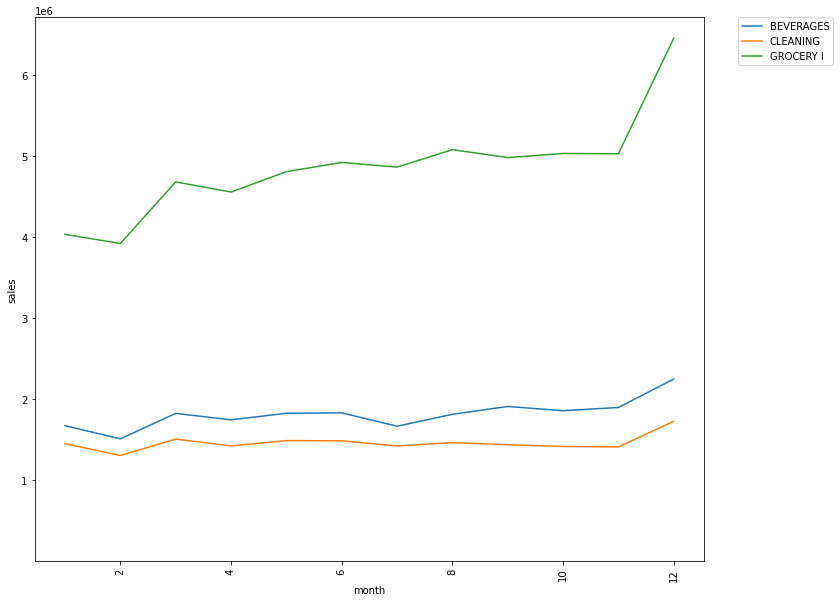

In [99]:
plt.figure(figsize=(12,10))
sns.lineplot(x='month', y='sales', data=df_train_stores_2013_filtered, hue='family')
plt.xticks(rotation=90)
plt.ylim(bottom=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [ ]:
plt.figure(figsize=(12,10))
sns.lineplot(x='month', y='sales', data=df_train_stores_2013, hue='family')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [20]:
df_train_stores_2013.describe()

,Year,month,store_nbr,id,sales,onpromotion
count,648648.0,648648.000000,648648.000000,648648.000000,648648.00000,648648.0
mean,2013.0,6.510989,27.500000,324323.500000,216.47953,0.0
std,0.0,3.440612,15.585796,187248.693042,734.07453,0.0
min,2013.0,1.000000,1.000000,0.000000,0.00000,0.0
25%,2013.0,4.000000,14.000000,162161.750000,0.00000,0.0
50%,2013.0,7.000000,27.500000,324323.500000,0.00000,0.0
75%,2013.0,9.250000,41.000000,486485.250000,102.00000,0.0
max,2013.0,12.000000,54.000000,648647.000000,46271.00000,0.0


## Ploting the sales per month of the year 2014

In [21]:
df_train_stores_2014 = df_train_stores[df_train_stores["Year"]== 2014]
df_train_stores_2014

,Year,month,family,store_nbr,date,id,sales,onpromotion
648648,2014,1,AUTOMOTIVE,1,2014-01-01,648648,0.0,0
648649,2014,1,AUTOMOTIVE,1,2014-01-02,650430,3.0,0
648650,2014,1,AUTOMOTIVE,1,2014-01-03,652212,0.0,0
648651,2014,1,AUTOMOTIVE,1,2014-01-04,653994,0.0,0
648652,2014,1,AUTOMOTIVE,1,2014-01-05,655776,1.0,0
...,...,...,...,...,...,...,...,...
1297291,2014,12,SEAFOOD,54,2014-12-27,1290035,0.0,0
1297292,2014,12,SEAFOOD,54,2014-12-28,1291817,0.0,0
1297293,2014,12,SEAFOOD,54,2014-12-29,1293599,0.0,0
1297294,2014,12,SEAFOOD,54,2014-12-30,1295381,0.0,0


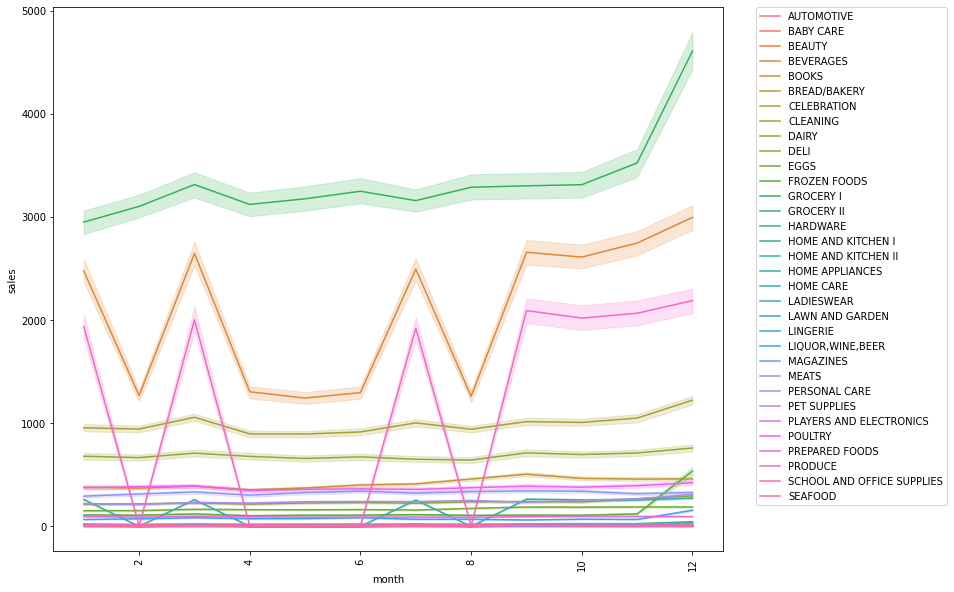

In [52]:
plt.figure(figsize=(12,10))
sns.lineplot(x='month', y='sales', data=df_train_stores_2014, hue='family')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [23]:
df_train_stores_2014.describe()

,Year,month,store_nbr,id,sales,onpromotion
count,648648.0,648648.000000,648648.000000,6.486480e+05,648648.000000,648648.000000
mean,2014.0,6.510989,27.500000,9.729715e+05,322.939786,0.707801
std,0.0,3.440612,15.585796,1.872487e+05,1004.784449,6.325709
min,2014.0,1.000000,1.000000,6.486480e+05,0.000000,0.000000
25%,2014.0,4.000000,14.000000,8.108098e+05,0.000000,0.000000
50%,2014.0,7.000000,27.500000,9.729715e+05,6.000000,0.000000
75%,2014.0,9.250000,41.000000,1.135133e+06,174.281000,0.000000
max,2014.0,12.000000,54.000000,1.297295e+06,45361.000000,205.000000


## Ploting the sales per month of the year 2015

In [24]:
df_train_stores_2015 = df_train_stores[df_train_stores["Year"]== 2015]
df_train_stores_2015

,Year,month,family,store_nbr,date,id,sales,onpromotion
1297296,2015,1,AUTOMOTIVE,1,2015-01-01,1297296,0.0,0
1297297,2015,1,AUTOMOTIVE,1,2015-01-02,1299078,2.0,0
1297298,2015,1,AUTOMOTIVE,1,2015-01-03,1300860,6.0,0
1297299,2015,1,AUTOMOTIVE,1,2015-01-04,1302642,4.0,0
1297300,2015,1,AUTOMOTIVE,1,2015-01-05,1304424,5.0,0
...,...,...,...,...,...,...,...,...
1945939,2015,12,SEAFOOD,54,2015-12-27,1938683,1.0,0
1945940,2015,12,SEAFOOD,54,2015-12-28,1940465,1.0,0
1945941,2015,12,SEAFOOD,54,2015-12-29,1942247,1.0,0
1945942,2015,12,SEAFOOD,54,2015-12-30,1944029,1.0,0


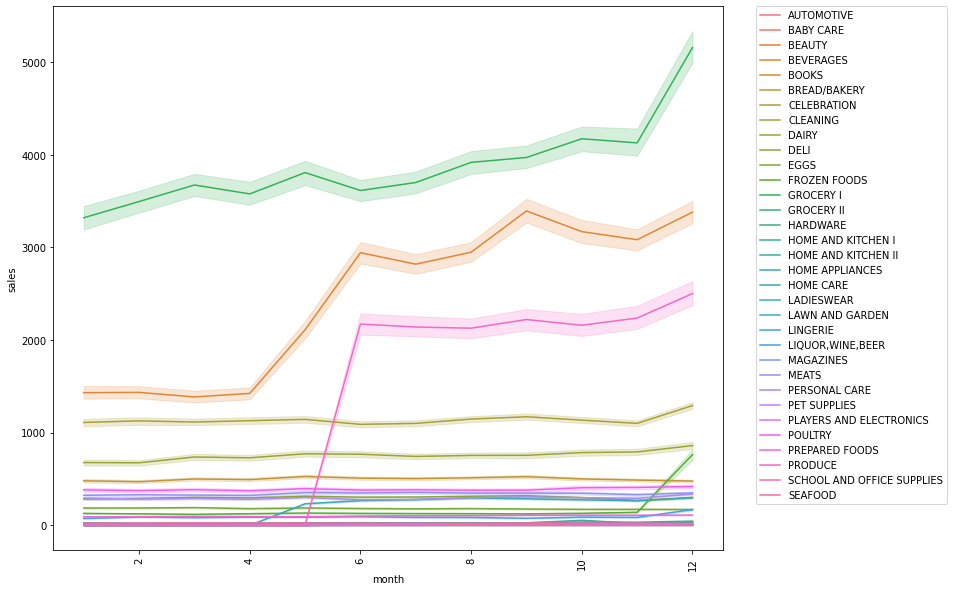

In [54]:
plt.figure(figsize=(12,10))
sns.lineplot(x='month', y='sales', data=df_train_stores_2015, hue='family')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [26]:
df_train_stores_2013.describe()

,Year,month,store_nbr,id,sales,onpromotion
count,648648.0,648648.000000,648648.000000,648648.000000,648648.00000,648648.0
mean,2013.0,6.510989,27.500000,324323.500000,216.47953,0.0
std,0.0,3.440612,15.585796,187248.693042,734.07453,0.0
min,2013.0,1.000000,1.000000,0.000000,0.00000,0.0
25%,2013.0,4.000000,14.000000,162161.750000,0.00000,0.0
50%,2013.0,7.000000,27.500000,324323.500000,0.00000,0.0
75%,2013.0,9.250000,41.000000,486485.250000,102.00000,0.0
max,2013.0,12.000000,54.000000,648647.000000,46271.00000,0.0


##  Ploting the sales per month of the year 2016

In [27]:
df_train_stores_2016 = df_train_stores[df_train_stores["Year"]== 2016]
df_train_stores_2016

,Year,month,family,store_nbr,date,id,sales,onpromotion
1945944,2016,1,AUTOMOTIVE,1,2016-01-01,1945944,0.0,0
1945945,2016,1,AUTOMOTIVE,1,2016-01-02,1947726,7.0,0
1945946,2016,1,AUTOMOTIVE,1,2016-01-03,1949508,1.0,0
1945947,2016,1,AUTOMOTIVE,1,2016-01-04,1951290,8.0,0
1945948,2016,1,AUTOMOTIVE,1,2016-01-05,1953072,7.0,0
...,...,...,...,...,...,...,...,...
2596369,2016,12,SEAFOOD,54,2016-12-27,2589113,2.0,0
2596370,2016,12,SEAFOOD,54,2016-12-28,2590895,1.0,0
2596371,2016,12,SEAFOOD,54,2016-12-29,2592677,0.0,0
2596372,2016,12,SEAFOOD,54,2016-12-30,2594459,0.0,0


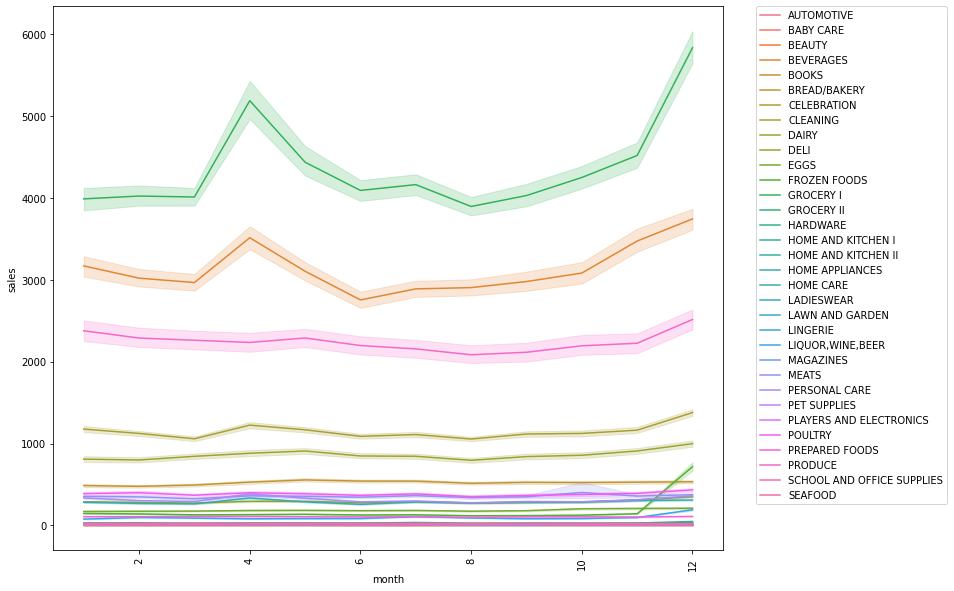

In [56]:
plt.figure(figsize=(12,10))
sns.lineplot(x='month', y='sales', data=df_train_stores_2016, hue='family')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

##  Ploting the sales per month of the year 2017 (only until August)

In [29]:
df_train_stores_2017 = df_train_stores[df_train_stores["Year"]== 2017]
df_train_stores_2017

,Year,month,family,store_nbr,date,id,sales,onpromotion
2596374,2017,1,AUTOMOTIVE,1,2017-01-01,2596374,0.0,0
2596375,2017,1,AUTOMOTIVE,1,2017-01-02,2598156,5.0,0
2596376,2017,1,AUTOMOTIVE,1,2017-01-03,2599938,4.0,0
2596377,2017,1,AUTOMOTIVE,1,2017-01-04,2601720,1.0,0
2596378,2017,1,AUTOMOTIVE,1,2017-01-05,2603502,2.0,0
...,...,...,...,...,...,...,...,...
3000883,2017,8,SEAFOOD,54,2017-08-11,2993627,0.0,0
3000884,2017,8,SEAFOOD,54,2017-08-12,2995409,1.0,1
3000885,2017,8,SEAFOOD,54,2017-08-13,2997191,2.0,0
3000886,2017,8,SEAFOOD,54,2017-08-14,2998973,0.0,0


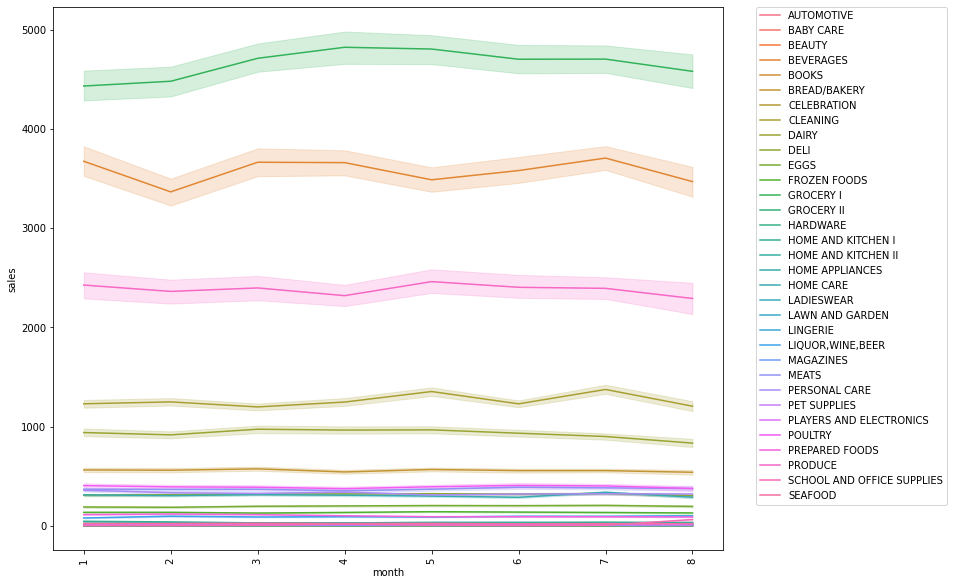

In [57]:
plt.figure(figsize=(12,10))
sns.lineplot(x='month', y='sales', data=df_train_stores_2017, hue='family')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

## What about the Oil price?

In [31]:
df_oil_price = pd.read_csv("gs://business-case/oil.csv")
df_oil_price

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [32]:
df_oil_price['date'] = pd.to_datetime(df_oil_price['date'])

In [33]:
df_oil_price['Year'] = df_oil_price['date'].dt.year

In [34]:
df_oil_price['month'] = df_oil_price['date'].dt.month

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


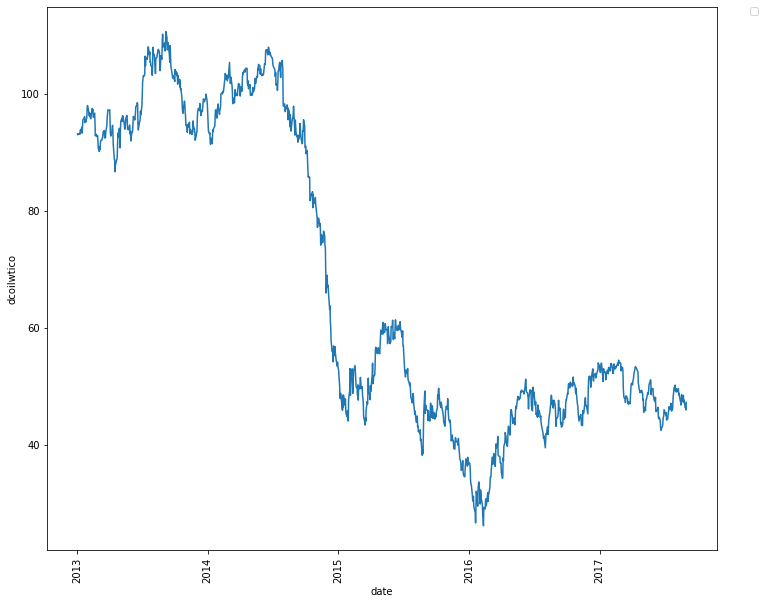

In [35]:
plt.figure(figsize=(12,10))
sns.lineplot(x='date', y='dcoilwtico', data=df_oil_price)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [36]:
df_oil_price.isnull().sum()

date           0
dcoilwtico    43
Year           0
month          0
dtype: int64

Replacing Nan values by the Mean of all the other values

### Ploting the Oil price per month of the year 2013

In [38]:
df_oil_price_2013 = df_oil_price[df_oil_price["Year"]== 2013]
df_oil_price_2013

,date,dcoilwtico,Year,month
0,2013-01-01,NaN,2013,1
1,2013-01-02,93.14,2013,1
2,2013-01-03,92.97,2013,1
3,2013-01-04,93.12,2013,1
4,2013-01-07,93.20,2013,1
...,...,...,...,...
256,2013-12-25,NaN,2013,12
257,2013-12-26,99.18,2013,12
258,2013-12-27,99.94,2013,12
259,2013-12-30,98.90,2013,12


Replacing Nan values with the value of the previous day

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="") # Instantiate a SimpleImputer object with your strategy of choice

imputer.fit(df_oil_price[['dcoilwtico']]) # Call the "fit" method on the object

df_oil_price['dcoilwtico'] = imputer.transform(df_oil_price[['dcoilwtico']]) # Call the "transform" method on the object

imputer.statistics_ # The mean is stored in the transformer's memory

In [44]:
df_oil_price_2013['dcoilwtico_interpolated'] = df_oil_price_2013.dcoilwtico.interpolate(limit_direction='both')
df_oil_price_2013

/tmp/ipykernel_14475/1361689043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil_price_2013['dcoilwtico_interpolated'] = df_oil_price_2013.dcoilwtico.interpolate(limit_direction='both')


,date,dcoilwtico,Year,month,dcoilwtico_interpolated
0,2013-01-01,NaN,2013,1,93.140
1,2013-01-02,93.14,2013,1,93.140
2,2013-01-03,92.97,2013,1,92.970
3,2013-01-04,93.12,2013,1,93.120
4,2013-01-07,93.20,2013,1,93.200
...,...,...,...,...,...
256,2013-12-25,NaN,2013,12,99.025
257,2013-12-26,99.18,2013,12,99.180
258,2013-12-27,99.94,2013,12,99.940
259,2013-12-30,98.90,2013,12,98.900


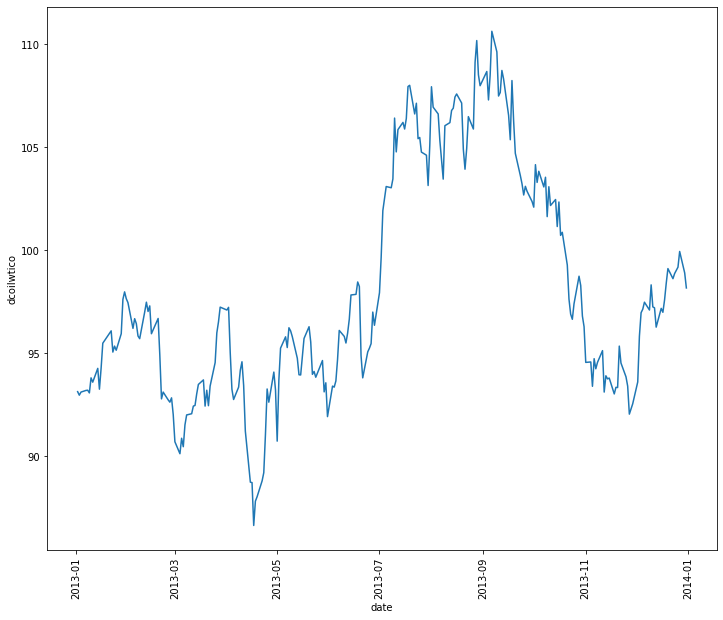

In [45]:
plt.figure(figsize=(12,10))
sns.lineplot(x='date', y='dcoilwtico', data=df_oil_price_2013)
plt.xticks(rotation=90);

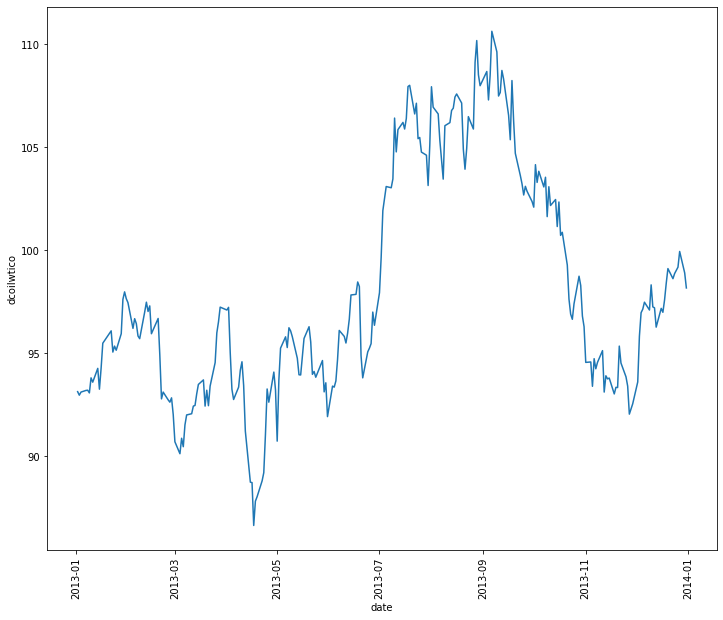

In [39]:
plt.figure(figsize=(12,10))
sns.lineplot(x='date', y='dcoilwtico', data=df_oil_price_2013)
plt.xticks(rotation=90);

In [50]:
df_train_stores_2013_oil = pd.merge(df_train_stores_2013, df_oil_price_2013, on="date")
df_train_stores_2013_oil.drop(columns= ["dcoilwtico",'month_x','Year_x'])

,family,store_nbr,date,id,sales,onpromotion,Year_y,month_y,dcoilwtico_interpolated
0,AUTOMOTIVE,1,2013-01-01,0,0.000000,0,2013,1,93.14
1,AUTOMOTIVE,2,2013-01-01,363,0.000000,0,2013,1,93.14
2,AUTOMOTIVE,3,2013-01-01,726,0.000000,0,2013,1,93.14
3,AUTOMOTIVE,4,2013-01-01,1089,0.000000,0,2013,1,93.14
4,AUTOMOTIVE,5,2013-01-01,1452,0.000000,0,2013,1,93.14
...,...,...,...,...,...,...,...,...,...
463315,SEAFOOD,50,2013-12-31,648383,12.388001,0,2013,12,98.17
463316,SEAFOOD,51,2013-12-31,648416,59.860000,0,2013,12,98.17
463317,SEAFOOD,52,2013-12-31,648449,0.000000,0,2013,12,98.17
463318,SEAFOOD,53,2013-12-31,648482,0.000000,0,2013,12,98.17
